# Анализ логов Hadoop

### Выполнил студент группы ББМО-01-23 Растегаев И.Г.

**Описание работы:**
- Обработка логов из файла `Hadoop_2k.log`
- Сохранение данных в базу SQLite
- Анализ и визуализация распределения уровней логирования

In [1]:
import re
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML


## Шаг 1: Загрузка логов

In [2]:
log_file_path = 'Hadoop_2k.log'
with open(log_file_path, 'r') as log_file:
    log_entries = log_file.readlines()
print(f"Количество строк в лог-файле: {len(log_entries)}")


Количество строк в лог-файле: 2000


## Шаг 2: Обработка логов

In [3]:
def extract_log_details(log_line):
    pattern = r'(?P<time>\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) (?P<level>\w+) \[(?P<thread>[^\]]+)\] (?P<module>[\w\.]+): (?P<info>.*)'
    result = re.match(pattern, log_line)
    return result.groupdict() if result else None

parsed_entries = [extract_log_details(entry.strip()) for entry in log_entries if extract_log_details(entry.strip()) is not None]
if not parsed_entries:
    print("Нет данных для обработки.")
else:
    print(f"Обработано {len(parsed_entries)} записей.")


Обработано 2000 записей.


## Шаг 3: Сохранение данных в базу SQLite

In [4]:
connection = sqlite3.connect('hadoop_log_analysis.db')
cursor = connection.cursor()
cursor.execute('DROP TABLE IF EXISTS log_data')
cursor.execute('''CREATE TABLE log_data (entry_id INTEGER PRIMARY KEY, time TEXT, level TEXT, thread TEXT, module TEXT, info TEXT)''')
for entry in parsed_entries:
    cursor.execute('''INSERT INTO log_data (time, level, thread, module, info) VALUES (:time, :level, :thread, :module, :info)''', entry)
connection.commit()
print("Данные успешно сохранены в базу данных.")


Данные успешно сохранены в базу данных.


## Шаг 4: Анализ данных

entry_id,time,level,thread,module,info
1,"2015-10-18 18:01:47,978",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Created MRAppMaster for application appattempt_1445144423722_0020_000001
2,"2015-10-18 18:01:48,963",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Executing with tokens:
3,"2015-10-18 18:01:48,963",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,"Kind: YARN_AM_RM_TOKEN, Service: , Ident: (appAttemptId { application_id { id: 20 cluster_timestamp: 1445144423722 } attemptId: 1 } keyId: -127633188)"
4,"2015-10-18 18:01:49,228",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,Using mapred newApiCommitter.
5,"2015-10-18 18:01:50,353",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter set in config null
6,"2015-10-18 18:01:50,509",INFO,main,org.apache.hadoop.mapreduce.v2.app.MRAppMaster,OutputCommitter is org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter
7,"2015-10-18 18:01:50,556",INFO,main,org.apache.hadoop.yarn.event.AsyncDispatcher,Registering class org.apache.hadoop.mapreduce.jobhistory.EventType for class org.apache.hadoop.mapreduce.jobhistory.JobHistoryEventHandler
8,"2015-10-18 18:01:50,556",INFO,main,org.apache.hadoop.yarn.event.AsyncDispatcher,Registering class org.apache.hadoop.mapreduce.v2.app.job.event.JobEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$JobEventDispatcher
9,"2015-10-18 18:01:50,556",INFO,main,org.apache.hadoop.yarn.event.AsyncDispatcher,Registering class org.apache.hadoop.mapreduce.v2.app.job.event.TaskEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$TaskEventDispatcher
10,"2015-10-18 18:01:50,556",INFO,main,org.apache.hadoop.yarn.event.AsyncDispatcher,Registering class org.apache.hadoop.mapreduce.v2.app.job.event.TaskAttemptEventType for class org.apache.hadoop.mapreduce.v2.app.MRAppMaster$TaskAttemptEventDispatcher


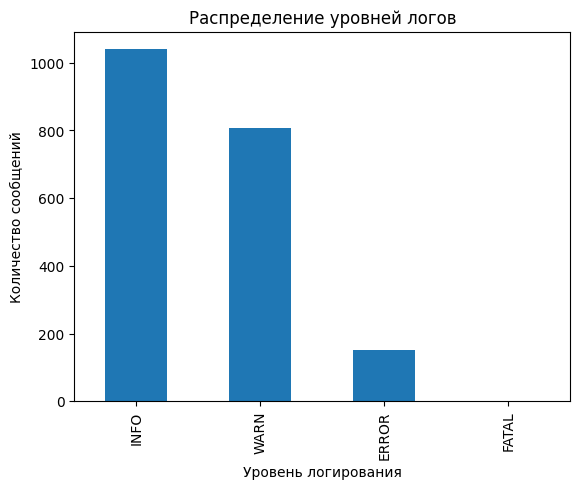

In [5]:
log_df = pd.read_sql_query('SELECT * FROM log_data', connection)
if log_df.empty:
    print("В базе данных отсутствуют данные для анализа.")
else:
    display(HTML(log_df.head(10).to_html(index=False)))
    level_counts = log_df['level'].value_counts()
    if not level_counts.empty:
        level_counts.plot(kind='bar')
        plt.xlabel('Уровень логирования')
        plt.ylabel('Количество сообщений')
        plt.title('Распределение уровней логов')
        plt.show()


## Шаг 5: Завершение работы

In [6]:
connection.close()
print("Работа завершена.")

Работа завершена.
